In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv('/content/StudentsPerformance.csv')#/content/StudentsPerformance.csv

In [42]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [45]:
data.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
970,female,group D,bachelor's degree,standard,none,89,100,100
391,female,group D,some college,standard,none,77,68,77
444,male,group A,some high school,free/reduced,none,79,82,73


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [50]:
data.isnull().values.any()

False

In [13]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
data.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [52]:
data.dtypes

Gender                         object
Race/Ethnicity                 object
Parental_Level_of_Education    object
Lunch                          object
Test_Preparation_Course        object
Math_Score                      int64
Reading_Score                   int64
Writing_Score                   int64
dtype: object

In [53]:
for i,col in enumerate(data.columns):
    print(i+1,". sütun ",col)

1 . sütun  Gender
2 . sütun  Race/Ethnicity
3 . sütun  Parental_Level_of_Education
4 . sütun  Lunch
5 . sütun  Test_Preparation_Course
6 . sütun  Math_Score
7 . sütun  Reading_Score
8 . sütun  Writing_Score


In [54]:
data['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

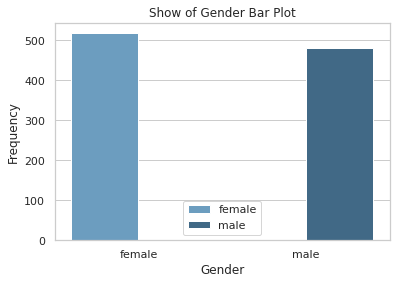

In [61]:
sns.set(style='whitegrid')
ax=sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette="Blues_d",hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

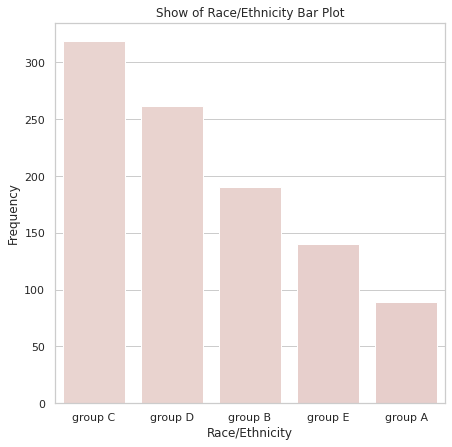

In [67]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x=data['Race/Ethnicity'].value_counts().index,
              y=data['Race/Ethnicity'].value_counts().values,
              palette=sns.cubehelix_palette(150))
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of Race/Ethnicity Bar Plot')
plt.show()

In [24]:
data.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


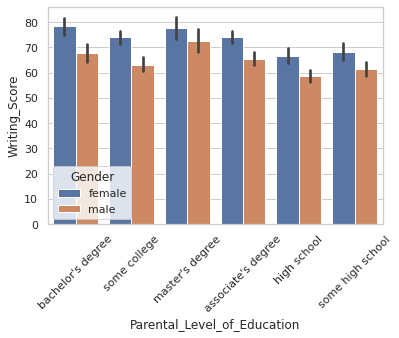

In [69]:
sns.barplot(x = "Parental_Level_of_Education", y = "Writing_Score", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

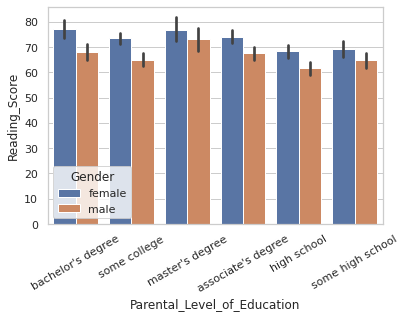

In [71]:
sns.barplot(x = "Parental_Level_of_Education", y = "Reading_Score", hue = "Gender", data = data)
plt.xticks(rotation=30)
plt.show()

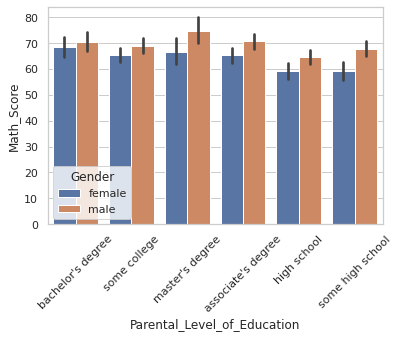

In [72]:
sns.barplot(x = "Parental_Level_of_Education", y = "Math_Score", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

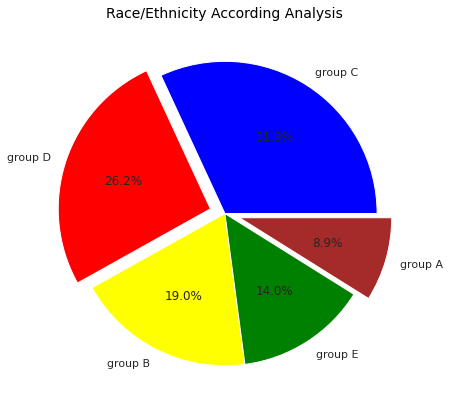

In [77]:
labels=data['Race/Ethnicity'].value_counts().index
colors=['blue','red','yellow','green','brown']
explode=[0,0.1,0,0,0.1]
values=data['Race/Ethnicity'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=14)
plt.show()

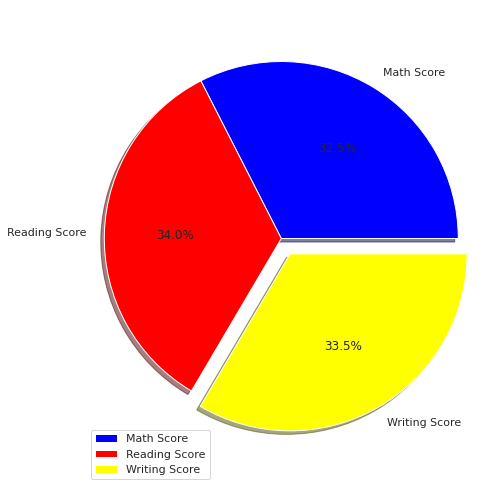

In [82]:
plt.figure(figsize=(7,7))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=[data.Math_Score.mean(),data.Reading_Score.mean(),data.Writing_Score.mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [83]:
data.groupby('Race/Ethnicity')['Reading_Score'].mean()

Race/Ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: Reading_Score, dtype: float64

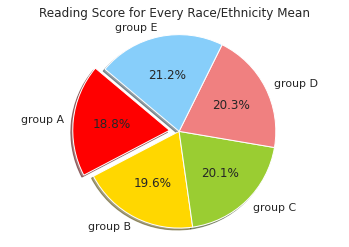

In [87]:

# Data to plot
labels = 'group A', 'group B', 'group C', 'group D','group E'
sizes = data.groupby('Race/Ethnicity')['Reading_Score'].mean().values
colors = ['red','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Reading Score for Every Race/Ethnicity Mean')
plt.axis('equal')
plt.show()

In [88]:
data.corr()

,Math_Score,Reading_Score,Writing_Score
Math_Score,1.000000,0.817580,0.802642
Reading_Score,0.817580,1.000000,0.954598
Writing_Score,0.802642,0.954598,1.000000


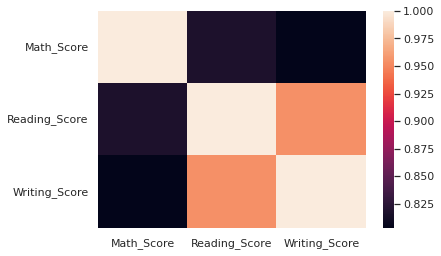

In [34]:
sns.heatmap(data.corr())
plt.show()

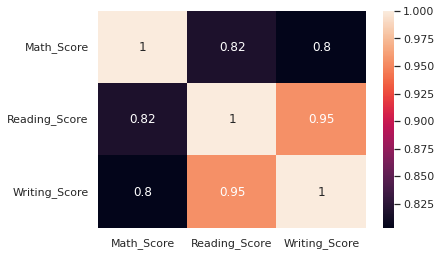

In [35]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [89]:
data.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


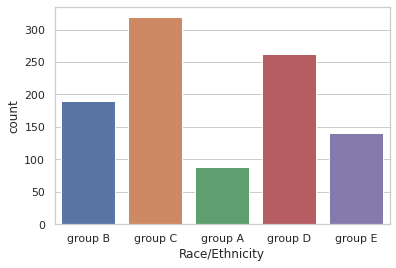

In [90]:
sns.countplot(data['Race/Ethnicity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


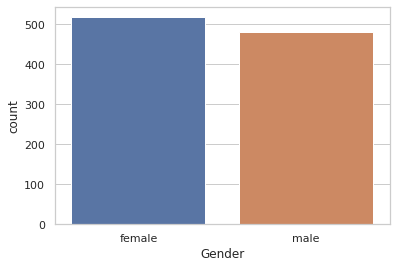

In [91]:

sns.countplot(data['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


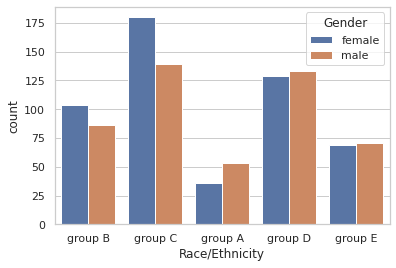

In [39]:
sns.countplot(data['Race/Ethnicity'],hue=data['Gender'])
plt.show()

References

https://www.kaggle.com/spscientist/students-performance-in-exams

https://seaborn.pydata.org/

https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

https://www.kaggle.com/biphili/seaborn-plot-to-visualize-iris-data

https://github.com/snnclsr/buyuk_veri_analizi/blob/master/week5/seaborntutorialforbeginners.ipynb